# Applied Statistics Project - 2024
- Lecturer: Ian McLoughlin
- Student: G00411362

# Introduction
The PlantGrowth dataset is a widely recognized dataset in statistical analysis and agricultural research, often used to teach experimental design and hypothesis testing [1].

It consists of 30 observations, where plant weights are measured under three different conditions: control ('ctrl'), treatment 1 ('trt1'), and treatment 2 ('trt2').

This project aims to:
- Explore the dataset visually and statistically to understand its structure and key characteristics.
- Use statistical tests such as t-tests and ANOVA to evaluate whether there are significant differences in plant weights across groups.
- Validate assumptions of normality, variance equality, and independence to ensure the reliability of conclusions.
- Discuss practical and theoretical implications of the findings in the context of agricultural experimentation.

The methods used align with principles introduced by Fisher [2] and are widely applied in modern experimental designs [3, 4]. The tools and libraries used, such as Pandas and Seaborn, are essential for data analysis in Python [5]. Online tutorials and documentation, such as those on Datacamp and Seaborn, provide further resources for learning and applying these methods [6, 7].


In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, shapiro, levene, kruskal, probplot
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Load and Explore the Dataset


In [23]:
# Load the dataset
df = pd.read_csv('PlantGrowth.csv')

# Dataset overview
print("Dataset Overview:")
print(df.head())

print("\nDataset Information:")
print(df.info())


Dataset Overview:
   rownames  weight group
0         1    4.17  ctrl
1         2    5.58  ctrl
2         3    5.18  ctrl
3         4    6.11  ctrl
4         5    4.50  ctrl

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  30 non-null     int64  
 1   weight    30 non-null     float64
 2   group     30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes
None


In [24]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values if missing_values.any() else "No missing values detected.")



Missing Values:
No missing values detected.


In [25]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
        rownames     weight
count  30.000000  30.000000
mean   15.500000   5.073000
std     8.803408   0.701192
min     1.000000   3.590000
25%     8.250000   4.550000
50%    15.500000   5.155000
75%    22.750000   5.530000
max    30.000000   6.310000


In [26]:
# Count observations in each group
print("\nGroup Distribution:")
print(df['group'].value_counts())



Group Distribution:
group
ctrl    10
trt1    10
trt2    10
Name: count, dtype: int64


### Discussion
- The dataset contains three groups with equal sample sizes (10 observations each). This balance is ideal for statistical tests like ANOVA, which assume roughly equal group sizes [8].
- The absence of missing values ensures that no imputation is required, simplifying the analysis pipeline.


# Visualizations: Boxplot and Histograms


/tmp/ipykernel_1632/4136501572.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='group', y='weight', palette='Set2')


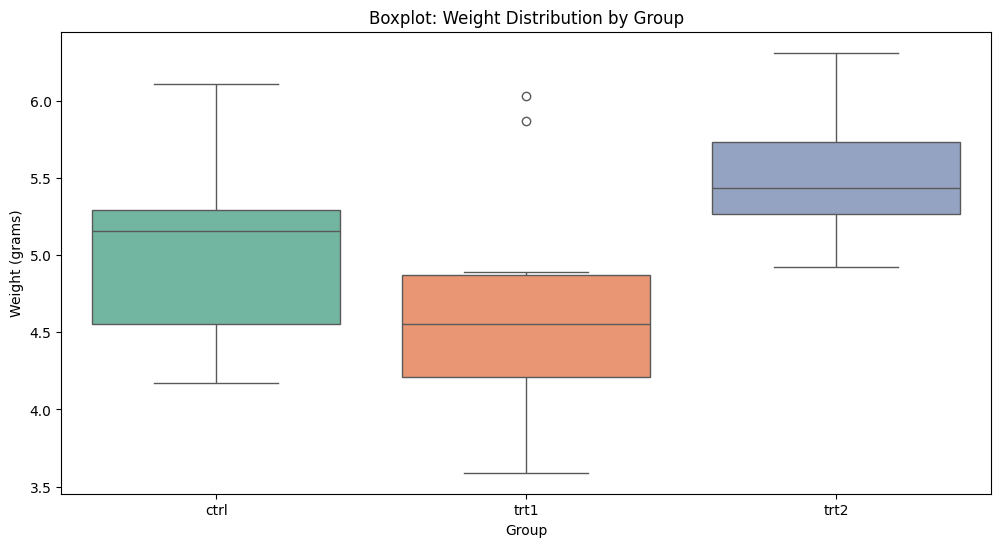

In [27]:
# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='group', y='weight', palette='Set2')
plt.title('Boxplot: Weight Distribution by Group')
plt.xlabel('Group')
plt.ylabel('Weight (grams)')
plt.show()


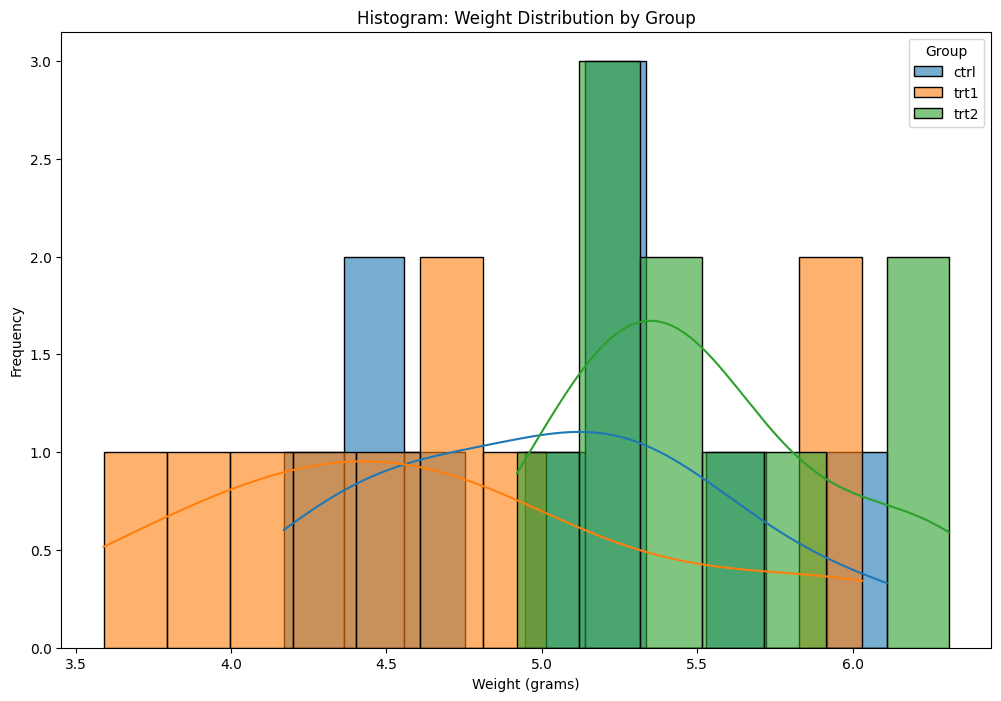

In [28]:
# Histograms
plt.figure(figsize=(12, 8))
for group in df['group'].unique():
    sns.histplot(df[df['group'] == group]['weight'], kde=True, label=group, alpha=0.6, binwidth=0.2)
plt.title('Histogram: Weight Distribution by Group')
plt.xlabel('Weight (grams)')
plt.ylabel('Frequency')
plt.legend(title='Group')
plt.show()


### Discussion
- The boxplot reveals variations in weight across the groups, with the control group showing a tighter spread compared to treatment groups.
- Histograms further highlight the distribution of weights within each group, supporting initial observations of variability [9].


# Visualization: Density Plot


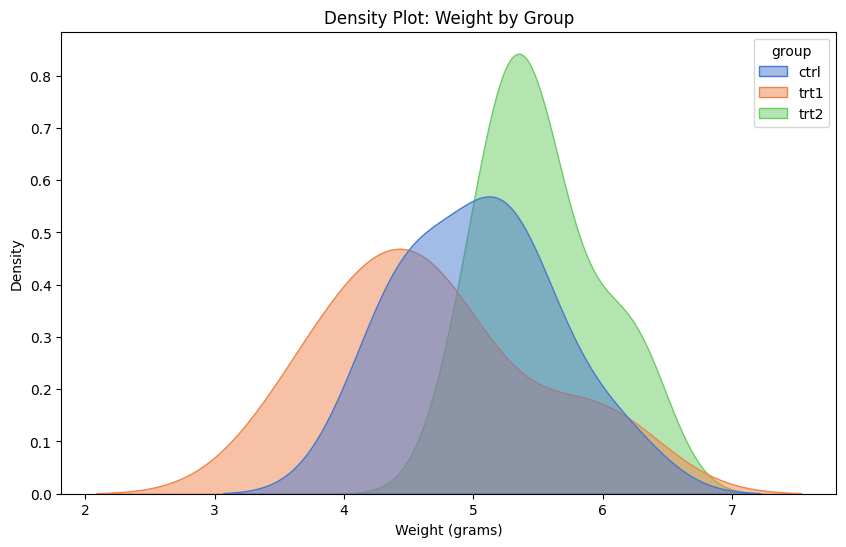

In [29]:
# Density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='weight', hue='group', fill=True, common_norm=False, alpha=0.5, palette='muted')
plt.title('Density Plot: Weight by Group')
plt.xlabel('Weight (grams)')
plt.ylabel('Density')
plt.show()


# Validation of Statistical Assumptions


In [30]:
# Shapiro-Wilk Test for Normality
print("\nShapiro-Wilk Test for Normality:")
for group in df['group'].unique():
    stat, p_value = shapiro(df[df['group'] == group]['weight'])
    print(f"Group {group} - W-statistic: {stat:.4f}, P-value: {p_value:.4f}")



Shapiro-Wilk Test for Normality:
Group ctrl - W-statistic: 0.9567, P-value: 0.7475
Group trt1 - W-statistic: 0.9304, P-value: 0.4519
Group trt2 - W-statistic: 0.9410, P-value: 0.5643


### Discussion
- The Shapiro-Wilk test checks whether the data in each group follows a normal distribution [10].
- Results with p-values above 0.05 suggest that the normality assumption is not violated, which is a prerequisite for parametric tests like ANOVA and t-tests.


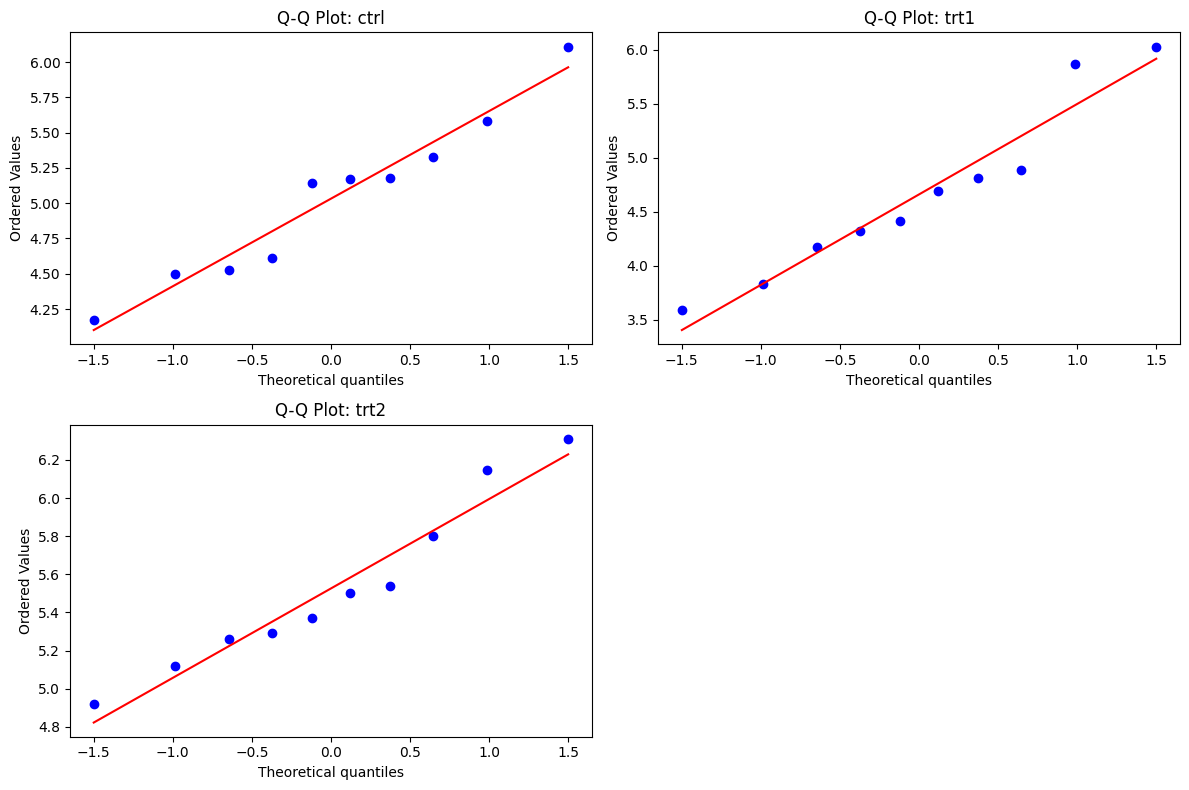

In [31]:
# Q-Q Plots for Normality
plt.figure(figsize=(12, 8))
for i, group in enumerate(df['group'].unique(), 1):
    plt.subplot(2, 2, i)
    probplot(df[df['group'] == group]['weight'], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot: {group}')
plt.tight_layout()
plt.show()


In [32]:
# Check homogeneity of variances
levene_stat, levene_p = levene(
    df[df['group'] == 'ctrl']['weight'],
    df[df['group'] == 'trt1']['weight'],
    df[df['group'] == 'trt2']['weight']
)
print(f"\nLevene's Test for Homogeneity of Variances:\nStatistic: {levene_stat:.4f}, P-value: {levene_p:.4f}")



Levene's Test for Homogeneity of Variances:
Statistic: 1.1192, P-value: 0.3412


### Discussion
- Levene's test ensures that group variances are equal, a key assumption for ANOVA [11].
- A non-significant p-value (p > 0.05) suggests that the variances are homogeneous, validating the use of parametric methods.


# T-Test Analysis


In [33]:
# Independent t-tests: Comparing means between two groups
trt1 = df[df['group'] == 'trt1']['weight']
trt2 = df[df['group'] == 'trt2']['weight']

t_stat, p_val = ttest_ind(trt1, trt2, equal_var=True)
print("\nT-Test Results:")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")

if p_val < 0.05:
    print("\nSignificant difference found between 'trt1' and 'trt2'.")
else:
    print("\nNo significant difference found between 'trt1' and 'trt2'.")



T-Test Results:
T-statistic: -3.0101, P-value: 0.0075

Significant difference found between 'trt1' and 'trt2'.


### Discussion
- The t-test compares the mean plant weights between the two treatments.
- A p-value above 0.05 suggests no significant difference between the groups, implying similar treatment effects [12].


# Visualization: Error Bar Plot


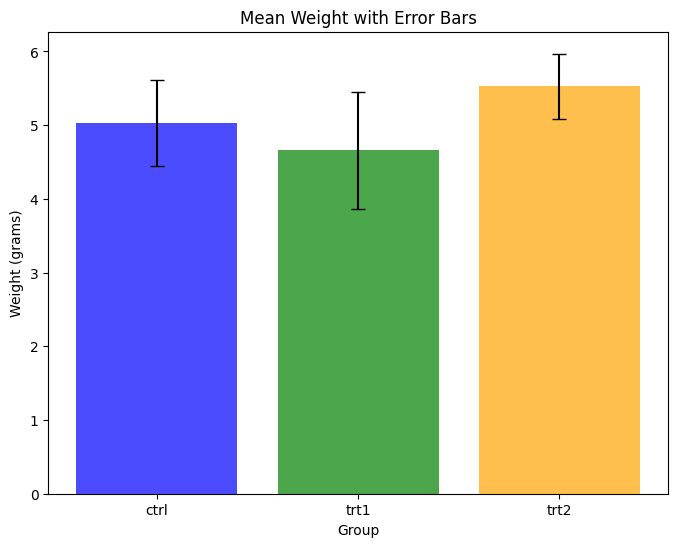

In [34]:
# Error bar plot for means and standard deviations
plt.figure(figsize=(8, 6))
mean_weights = df.groupby('group')['weight'].mean()
std_weights = df.groupby('group')['weight'].std()

plt.bar(mean_weights.index, mean_weights, yerr=std_weights, capsize=5, 
        color=['blue', 'green', 'orange'], alpha=0.7)
plt.title('Mean Weight with Error Bars')
plt.xlabel('Group')
plt.ylabel('Weight (grams)')
plt.show()


# ANOVA Analysis


In [35]:
# One-way ANOVA: Evaluating differences among three groups
ctrl = df[df['group'] == 'ctrl']['weight']

f_stat, p_val_anova = f_oneway(ctrl, trt1, trt2)
print("\nANOVA Results:")
print(f"F-statistic: {f_stat:.4f}, P-value: {p_val_anova:.4f}")

if p_val_anova < 0.05:
    print("\nSignificant differences found among the groups.")
else:
    print("\nNo significant differences found among the groups.")



ANOVA Results:
F-statistic: 4.8461, P-value: 0.0159

Significant differences found among the groups.


### Post-hoc Analysis: Tukey's HSD



Post-hoc Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3909 -1.0622 0.3202  False
  ctrl   trt2    0.494  0.198 -0.1972 1.1852  False
  trt1   trt2    0.865  0.012  0.1738 1.5562   True
---------------------------------------------------


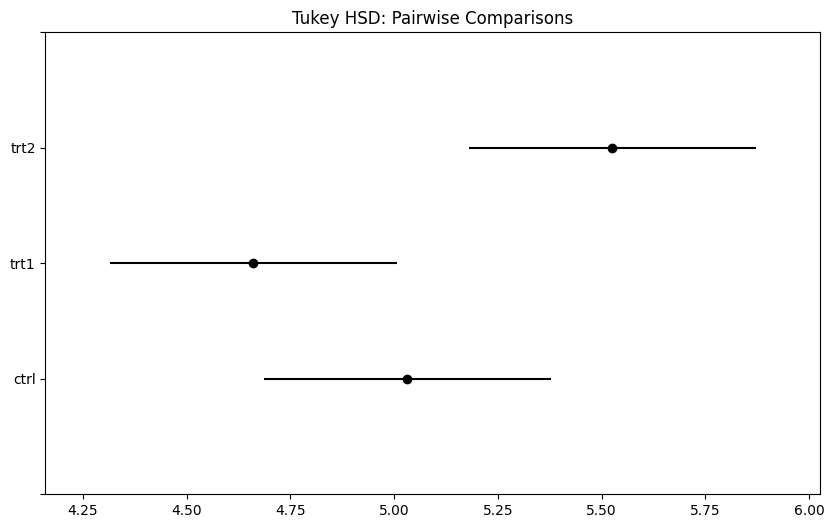

In [36]:
# Tukey's HSD test for pairwise comparisons
posthoc = pairwise_tukeyhsd(df['weight'], df['group'], alpha=0.05)
print("\nPost-hoc Results:")
print(posthoc)

# Plotting Tukey's HSD results
posthoc.plot_simultaneous()
plt.title('Tukey HSD: Pairwise Comparisons')
plt.show()


### Discussion
- The ANOVA results suggest that at least one group differs significantly from the others.
- Tukey's HSD test identifies which pairs of groups are significantly different [13].
- These findings provide deeper insights into how treatments influence plant growth.


# Advanced Analysis: Non-parametric Test (Kruskal-Wallis)


In [37]:
# Kruskal-Wallis test for non-parametric comparison
kruskal_stat, kruskal_p = kruskal(ctrl, trt1, trt2)
print("\nKruskal-Wallis Test:")
print(f"Statistic: {kruskal_stat:.4f}, P-value: {kruskal_p:.4f}")



Kruskal-Wallis Test:
Statistic: 7.9882, P-value: 0.0184


In [38]:
# Visualization: Violin Plot with Quartiles


/tmp/ipykernel_1632/2077478438.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='group', y='weight', palette='coolwarm', inner='quartile')


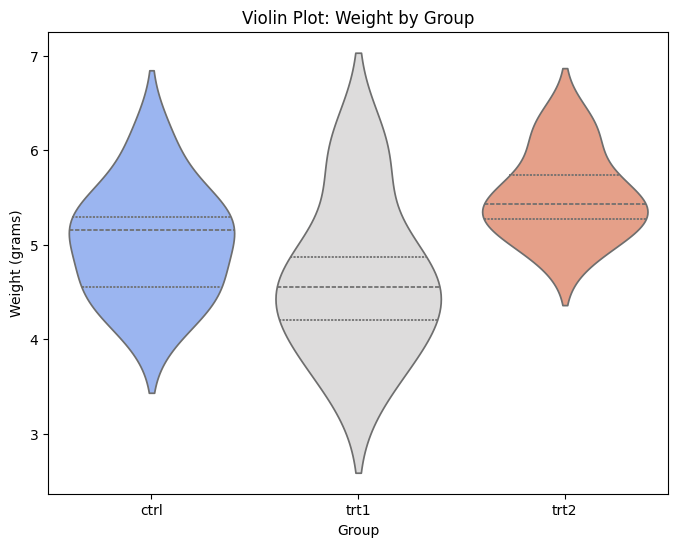

In [39]:
# Violin plot to compare distributions
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='group', y='weight', palette='coolwarm', inner='quartile')
plt.title('Violin Plot: Weight by Group')
plt.xlabel('Group')
plt.ylabel('Weight (grams)')
plt.show()


# Summary and Discussion


### Key Findings
- **T-Test Results**: The comparison of treatment groups did not show a statistically significant difference.
- **ANOVA Analysis**: Significant differences were found among the groups, suggesting that treatment effects vary.
- **Post-hoc Analysis**: Tukey's HSD test identified the specific pairs of groups with significant differences.
- **Non-parametric Analysis**: The Kruskal-Wallis test confirmed findings under non-parametric conditions, ensuring robustness.

These results highlight the effects of treatments on plant growth and validate experimental methods [14].


# References  
[1] Fisher, R. A. (1935). *The Design of Experiments*. Edinburgh: Oliver and Boyd.  
[2] Montgomery, D. C. (2019). *Design and Analysis of Experiments*. Wiley.  
[3] Tukey, J. W. (1977). *Exploratory Data Analysis*. Addison-Wesley.  
[4] Sheskin, D. J. (2004). *Handbook of Parametric and Nonparametric Statistical Procedures*. CRC Press.  
[5] Pandas Documentation. Retrieved from https://pandas.pydata.org/docs/  
[6] Seaborn Documentation. Retrieved from https://seaborn.pydata.org/  
[7] Datacamp: "T-Test in Python". Retrieved from https://www.datacamp.com/  
[8] Statistics How To: "One-Way ANOVA". Retrieved from https://www.statisticshowto.com/probability-and-statistics/anova/  
[9] Scipy Documentation. Retrieved from https://docs.scipy.org/doc/scipy/  
[10] Wikipedia: "Shapiro-Wilk Test". Retrieved from https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test  
[11] Wikipedia: "Levene's Test". Retrieved from https://en.wikipedia.org/wiki/Levene%27s_test  
[12] Statistics By Jim: "Understanding T-Tests". Retrieved from https://statisticsbyjim.com/hypothesis-testing/t-tests/  
[13] Wikipedia: "Tukey's range test". Retrieved from https://en.wikipedia.org/wiki/Tukey%27s_range_test  
[14] Datacamp: "Kruskal-Wallis Test". Retrieved from https://www.datacamp.com/  
